# coinRun3.py R.Nagler, 2019
# simulates coingame from Ole Peters ergodicity_economics.pdf
# also with wealthtax as cooperative measure
# and specific leverage

In [1]:
# coinRun3.py R.Nagler, 2019
# simulates coingame from https://ergodicityeconomics.files.wordpress.com/2018/06/ergodicity_economics.pdf
# http://lml.org.uk/research/economics/
#
# run with: python3 coinRun3.py
# shows a lot of trajectory graph figures, to see next graph move window
# to end program close all figures
# required: python3, random, numpy, matplotlib
# install on linux: 
# sudo apt-get install python3-tk  # missing in ubuntu-dist
# sudo apt-get install python-numpy python-scipy python-matplotlib

import random
import numpy as np 
import matplotlib.pyplot as plt 

print("coinRun3.py Monte Carlo simulated coingame from Ole Peters LML")
print("Tossing a coin many times, each time it comes up heads we increase player's wealth by 50%, each time it comes up tails we reduce player's wealth by 40% (multiplying by 1.5 or 0.6)")
# get parameters for run
# number of rounds to play 100
nrRound = 1000

# number of players 1000
nrPlayer = 10000

# wealth tax to pay after each round 0.0
tax = 0.0

# leverage, fraction of wealth to bet in next round 1.0
lev = 1.0

# bet = initial wealth of each player
bet = 1.0

# win factor for tails (Loss) 0.6
lossFactor = 0.6

# win factor for heads (Success) 1.5
winFactor = 1.5

print ('these parameters will be used:')
print('nrRound = ', nrRound)
print('nrPlayer = ', nrPlayer)
print('tax = ', tax)
print('leverage = ', lev)
print('bet, initial wealth of each player = ', bet)
print('lossFactor = ', lossFactor)
print('winFactor = ', winFactor)



coinRun3.py Monte Carlo simulated coingame from Ole Peters LML
Tossing a coin many times, each time it comes up heads we increase player's wealth by 50%, each time it comes up tails we reduce player's wealth by 40% (multiplying by 1.5 or 0.6)
these parameters will be used:
nrRound =  1000
nrPlayer =  10000
tax =  0.0
leverage =  1.0
bet, initial wealth of each player =  1.0
lossFactor =  0.6
winFactor =  1.5


In [2]:
meanW = np.zeros((nrRound+1), dtype=np.float32) #ensembleAverageWealth
medW = np.zeros((nrRound+1), dtype=np.float32) #median Wealth
sumW = np.zeros((nrRound+1), dtype=np.float32) #wealth of all players
bankW = np.zeros((nrRound+1), dtype=np.float32) #wealth of bank
aliquotWin = np.zeros((nrRound+1), dtype=np.float32) # average win of Round
indivTax = np.zeros((nrPlayer), dtype=np.float32) # collected tax in current Round
roundErr = np.zeros((nrRound+1), dtype=np.float32) # rounding error in current Round
print('please wait for message: win factors set')

# calculate new win factors f
# set random win factors per Round and Player, can be reused in console mode
f = np.zeros((nrRound,nrPlayer), dtype=np.float32)
for iR in range(0,nrRound):
  for iP in range(0,nrPlayer):
    f[iR,iP] = random.choice([lossFactor,winFactor]) # random multipliers
    
print('win factors set')



please wait for message: win factors set
win factors set


# return here after changing tax or/and leverage

In [3]:
# calculate win matrix w
# w[iR, iP] == wealth of player iP in Round iR
w = np.zeros((nrRound+1,nrPlayer), dtype=np.float32)
w[0, :] = bet #start wealth = bet
#np.seterr(all='ignore') #suppress warnings on float errors, only for float16
for iR in range(0,nrRound):
  w[iR+1] = (w[iR] * (1 - lev)) + (w[iR] * f[iR] * lev) # amount not invested + win 
  indivTax = w[iR] * tax # wealthtax from last round for each player
  aliquotTax = np.sum(indivTax) / nrPlayer # tax to be redistributed to each Player
  w[iR+1] += aliquotTax - indivTax # subtract individual Tax and redistribute it evenly
  sumW[iR+1] = np.sum(w[iR+1])
  medW[iR+1] = np.median(w[iR+1])
  meanW[iR+1] = sumW[iR+1] / nrPlayer
  bankW[iR+1] = bankW[iR] + sumW[iR] - sumW[iR+1]
  aliquotWin[iR+1] = (sumW[iR+1] - sumW[iR]) / nrPlayer
  roundErr[iR+1] = sumW[iR+1] + bankW[iR+1]
#  w[iR+1] = w[iR] + aliquotWin[iR+1] # share everything, only for test

print('overall min wealth = ', np.amin(w))
print('overall max wealth = ', np.amax(w))
print('last round max wealth = ', np.amax(w[nrRound]))
print('last round bank wealth = ', bankW[nrRound])
print('last round aliquotWin = ', aliquotWin[nrRound])
print('last round meanW = ', meanW[nrRound])
print('last round medW = ', medW[nrRound])
print('last round sumW = ', sumW[nrRound])



overall min wealth =  1e-45
overall max wealth =  8452919.0
last round max wealth =  3.9785364
last round bank wealth =  -5.6767406
last round aliquotWin =  2.9940844e-05
last round meanW =  0.00056767405
last round medW =  1.3220978e-23
last round sumW =  5.6767406


wealth histogram:  (array([9.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]), array([1.4012985e-45, 1.3261788e-01, 2.6523575e-01, 3.9785364e-01,
       5.3047150e-01, 6.6308939e-01, 7.9570729e-01, 9.2832518e-01,
       1.0609430e+00, 1.1935610e+00, 1.3261788e+00, 1.4587966e+00,
       1.5914146e+00, 1.7240324e+00, 1.8566504e+00, 1.9892682e+00,
       2.1218860e+00, 2.2545040e+00, 2.3871219e+00, 2.5197396e+00,
       2.6523576e+00, 2.7849755e+00, 2.9175932e+00, 3.0502112e+00,
       3.1828291e+00, 3.3154469e+00, 3.4480648e+00, 3.5806828e+00,
       3.7133007e+00, 3.8459184e+00, 3.9785364e+00], dtype=float32), <a list of 30 Patch objects>)


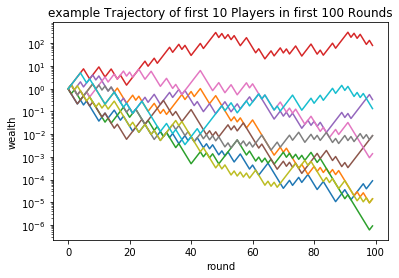

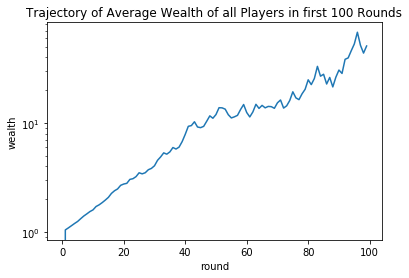

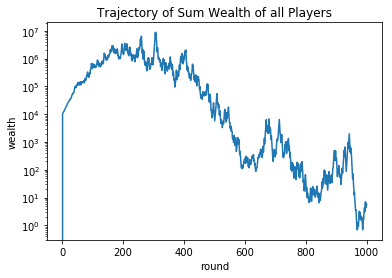

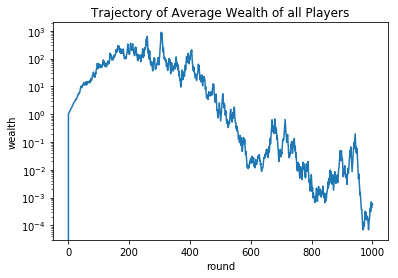

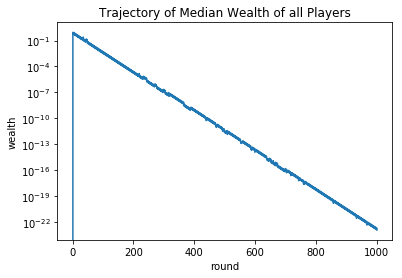

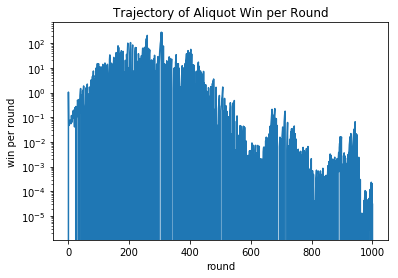

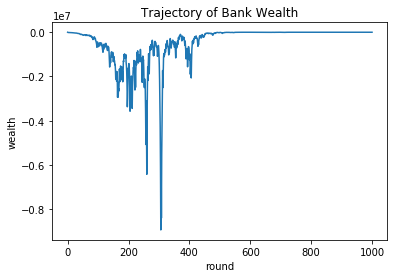

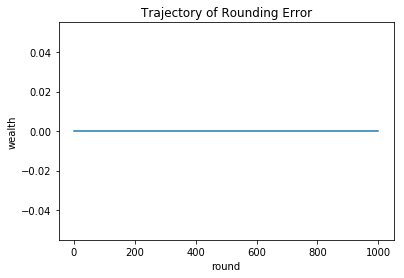

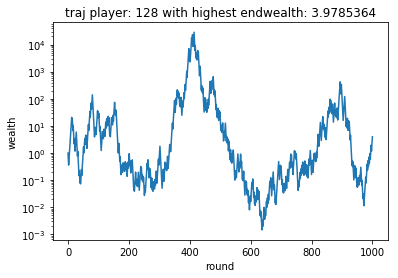

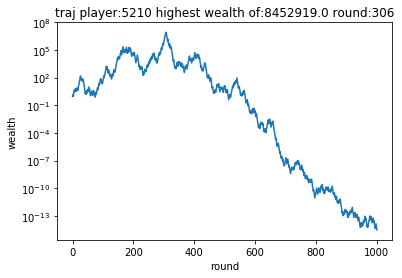

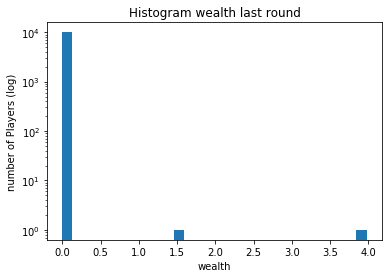

In [4]:
plt.figure()  
for iP in range(0,min(10, nrPlayer)):
  plt.plot(w[ 0:min(100, nrRound) , iP])

plt.title('example Trajectory of first 10 Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW[0:min(100, nrRound)])
plt.title('Trajectory of Average Wealth of all Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(sumW)
plt.title('Trajectory of Sum Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW)
plt.title('Trajectory of Average Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(medW)
plt.title('Trajectory of Median Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(aliquotWin)
plt.title('Trajectory of Aliquot Win per Round')
plt.yscale('log')
plt.ylabel("win per round")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(bankW)
plt.title('Trajectory of Bank Wealth')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(roundErr)
plt.title('Trajectory of Rounding Error')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
maxP = np.argmax(w[nrRound])
plt.plot(w[ : , maxP])
plt.title('traj player: '  + str(maxP) + ' with highest endwealth: ' + str(w[nrRound,maxP]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
plt.plot(w[ : , ind[1]])
plt.title('traj player:'  + str(ind[1]) + ' highest wealth of:' + str(w[ind[0],ind[1]]) + ' round:' + str(ind[0]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
print('wealth histogram: ', plt.hist(w[nrRound],bins=30,log=True))
plt.title('Histogram wealth last round')
plt.ylabel("number of Players (log)")
plt.xlabel("wealth")
# plt.grid(True)
plt.draw()
plt.show()



In [5]:
# check the influence of a 5% wealth tax, using same win factors
# wealth tax to pay after each round 0.0
tax = 0.05
lev = 1.0
print ('these parameters will be used:')
print('nrRound = ', nrRound)
print('nrPlayer = ', nrPlayer)
print('tax = ', tax)
print('leverage = ', lev)
print('bet, initial wealth of each player = ', bet)
print('lossFactor = ', lossFactor)
print('winFactor = ', winFactor)

# goto ln(3) calculate win matrix w



these parameters will be used:
nrRound =  1000
nrPlayer =  10000
tax =  0.05
leverage =  1.0
bet, initial wealth of each player =  1.0
lossFactor =  0.6
winFactor =  1.5


In [6]:
# calculate win matrix w
# w[iR, iP] == wealth of player iP in Round iR
w = np.zeros((nrRound+1,nrPlayer), dtype=np.float32)
w[0, :] = bet #start wealth = bet
#np.seterr(all='ignore') #suppress warnings on float errors, only for float16
for iR in range(0,nrRound):
  w[iR+1] = (w[iR] * (1 - lev)) + (w[iR] * f[iR] * lev) # amount not invested + win 
  indivTax = w[iR] * tax # wealthtax from last round for each player
  aliquotTax = np.sum(indivTax) / nrPlayer # tax to be redistributed to each Player
  w[iR+1] += aliquotTax - indivTax # subtract individual Tax and redistribute it evenly
  sumW[iR+1] = np.sum(w[iR+1])
  medW[iR+1] = np.median(w[iR+1])
  meanW[iR+1] = sumW[iR+1] / nrPlayer
  bankW[iR+1] = bankW[iR] + sumW[iR] - sumW[iR+1]
  aliquotWin[iR+1] = (sumW[iR+1] - sumW[iR]) / nrPlayer
  roundErr[iR+1] = sumW[iR+1] + bankW[iR+1]
#  w[iR+1] = w[iR] + aliquotWin[iR+1] # share everything, only for test

print('overall min wealth = ', np.amin(w))
print('overall max wealth = ', np.amax(w))
print('last round max wealth = ', np.amax(w[nrRound]))
print('last round bank wealth = ', bankW[nrRound])
print('last round aliquotWin = ', aliquotWin[nrRound])
print('last round meanW = ', meanW[nrRound])
print('last round medW = ', medW[nrRound])
print('last round sumW = ', sumW[nrRound])



overall min wealth =  0.15238781
overall max wealth =  2.1685962e+23
last round max wealth =  1.112057e+23
last round bank wealth =  -7.1215737e+24
last round aliquotWin =  4.0387186e+19
last round meanW =  7.121574e+20
last round medW =  2.9828818e+20
last round sumW =  7.1215737e+24


wealth histogram:  (array([9.761e+03, 1.480e+02, 4.300e+01, 1.400e+01, 9.000e+00, 7.000e+00,
       4.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]), array([7.1163537e+19, 3.7756482e+21, 7.4801328e+21, 1.1184618e+22,
       1.4889102e+22, 1.8593586e+22, 2.2298072e+22, 2.6002555e+22,
       2.9707040e+22, 3.3411526e+22, 3.7116009e+22, 4.0820492e+22,
       4.4524977e+22, 4.8229463e+22, 5.1933948e+22, 5.5638434e+22,
       5.9342919e+22, 6.3047400e+22, 6.6751885e+22, 7.0456371e+22,
       7.4160856e+22, 7.7865337e+22, 8.1569827e+22, 8.5274308e+22,
       8.8978798e+22, 9.2683279e+22, 9.6387760e+22, 1.0009225e+23,
       1.0379673e+23, 1.0750122e+23, 1.1120570e+23], dtype=float32), <a list of 30 Patch objects>)


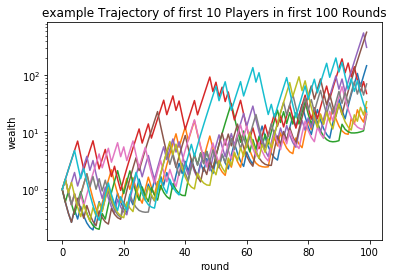

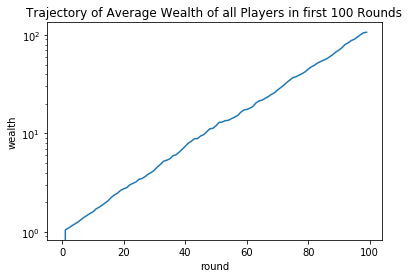

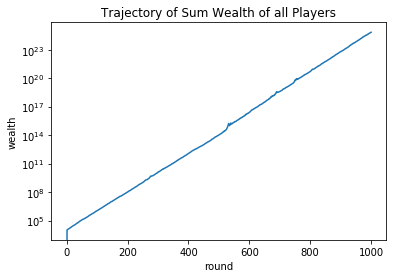

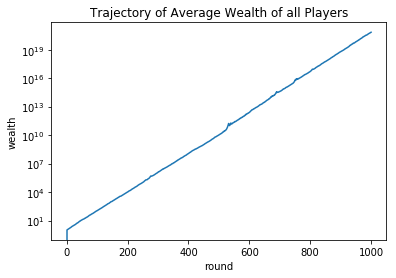

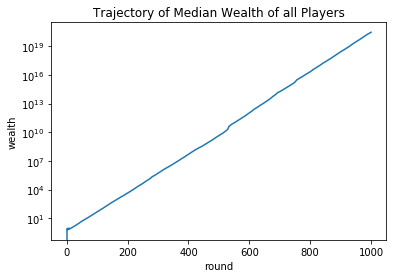

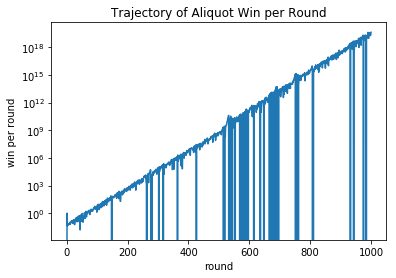

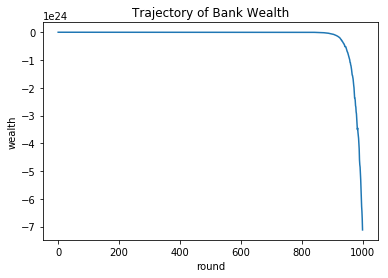

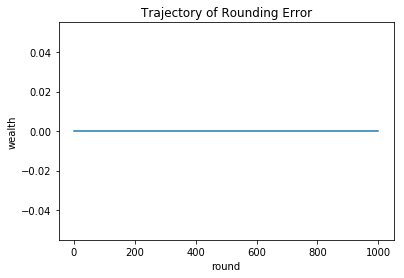

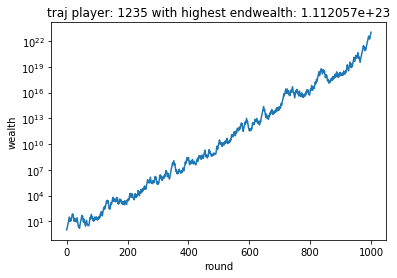

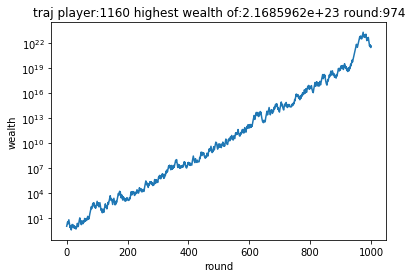

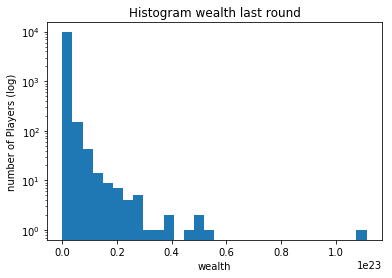

In [7]:
plt.figure()  
for iP in range(0,min(10, nrPlayer)):
  plt.plot(w[ 0:min(100, nrRound) , iP])

plt.title('example Trajectory of first 10 Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW[0:min(100, nrRound)])
plt.title('Trajectory of Average Wealth of all Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(sumW)
plt.title('Trajectory of Sum Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW)
plt.title('Trajectory of Average Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(medW)
plt.title('Trajectory of Median Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(aliquotWin)
plt.title('Trajectory of Aliquot Win per Round')
plt.yscale('log')
plt.ylabel("win per round")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(bankW)
plt.title('Trajectory of Bank Wealth')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(roundErr)
plt.title('Trajectory of Rounding Error')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
maxP = np.argmax(w[nrRound])
plt.plot(w[ : , maxP])
plt.title('traj player: '  + str(maxP) + ' with highest endwealth: ' + str(w[nrRound,maxP]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
plt.plot(w[ : , ind[1]])
plt.title('traj player:'  + str(ind[1]) + ' highest wealth of:' + str(w[ind[0],ind[1]]) + ' round:' + str(ind[0]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
print('wealth histogram: ', plt.hist(w[nrRound],bins=30,log=True))
plt.title('Histogram wealth last round')
plt.ylabel("number of Players (log)")
plt.xlabel("wealth")
# plt.grid(True)
plt.draw()
plt.show()



In [8]:
# check the influence of a leverage of 0.3, using same win factors
# leverage, fraction of wealth to bet in next round 1.0
tax = 0.0
lev = 0.3
print ('these parameters will be used:')
print('nrRound = ', nrRound)
print('nrPlayer = ', nrPlayer)
print('tax = ', tax)
print('leverage = ', lev)
print('bet, initial wealth of each player = ', bet)
print('lossFactor = ', lossFactor)
print('winFactor = ', winFactor)

# goto ln(3) calculate win matrix w



these parameters will be used:
nrRound =  1000
nrPlayer =  10000
tax =  0.0
leverage =  0.3
bet, initial wealth of each player =  1.0
lossFactor =  0.6
winFactor =  1.5


In [9]:
# calculate win matrix w
# w[iR, iP] == wealth of player iP in Round iR
w = np.zeros((nrRound+1,nrPlayer), dtype=np.float32)
w[0, :] = bet #start wealth = bet
#np.seterr(all='ignore') #suppress warnings on float errors, only for float16
for iR in range(0,nrRound):
  w[iR+1] = (w[iR] * (1 - lev)) + (w[iR] * f[iR] * lev) # amount not invested + win 
  indivTax = w[iR] * tax # wealthtax from last round for each player
  aliquotTax = np.sum(indivTax) / nrPlayer # tax to be redistributed to each Player
  w[iR+1] += aliquotTax - indivTax # subtract individual Tax and redistribute it evenly
  sumW[iR+1] = np.sum(w[iR+1])
  medW[iR+1] = np.median(w[iR+1])
  meanW[iR+1] = sumW[iR+1] / nrPlayer
  bankW[iR+1] = bankW[iR] + sumW[iR] - sumW[iR+1]
  aliquotWin[iR+1] = (sumW[iR+1] - sumW[iR]) / nrPlayer
  roundErr[iR+1] = sumW[iR+1] + bankW[iR+1]
#  w[iR+1] = w[iR] + aliquotWin[iR+1] # share everything, only for test

print('overall min wealth = ', np.amin(w))
print('overall max wealth = ', np.amax(w))
print('last round max wealth = ', np.amax(w[nrRound]))
print('last round bank wealth = ', bankW[nrRound])
print('last round aliquotWin = ', aliquotWin[nrRound])
print('last round meanW = ', meanW[nrRound])
print('last round medW = ', medW[nrRound])
print('last round sumW = ', sumW[nrRound])



overall min wealth =  1.4063114e-05
overall max wealth =  5082309600.0
last round max wealth =  2798678300.0
last round bank wealth =  -10515325000.0
last round aliquotWin =  33234.637
last round meanW =  1051532.5
last round medW =  389.27582
last round sumW =  10515325000.0


wealth histogram:  (array([9.989e+03, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]), array([2.4261455e-05, 9.3289272e+07, 1.8657854e+08, 2.7986784e+08,
       3.7315709e+08, 4.6644637e+08, 5.5973568e+08, 6.5302496e+08,
       7.4631418e+08, 8.3960346e+08, 9.3289274e+08, 1.0261820e+09,
       1.1194714e+09, 1.2127606e+09, 1.3060499e+09, 1.3993391e+09,
       1.4926284e+09, 1.5859177e+09, 1.6792069e+09, 1.7724963e+09,
       1.8657855e+09, 1.9590748e+09, 2.0523640e+09, 2.1456534e+09,
       2.2389427e+09, 2.3322319e+09, 2.4255212e+09, 2.5188104e+09,
       2.6120998e+09, 2.7053891e+09, 2.7986783e+09], dtype=float32), <a list of 30 Patch objects>)


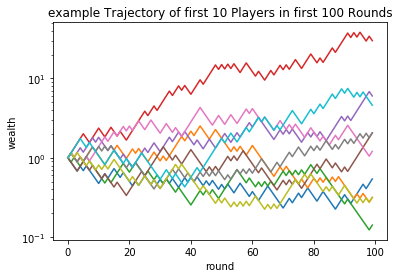

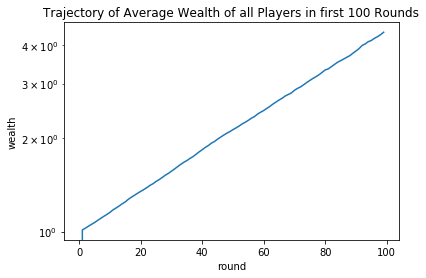

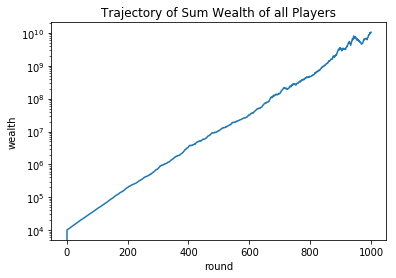

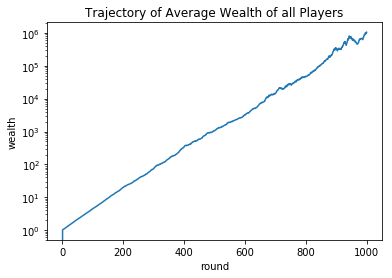

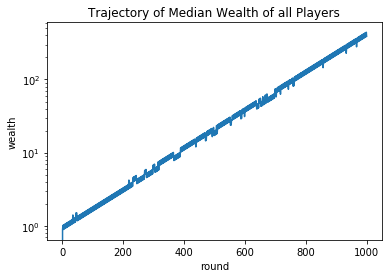

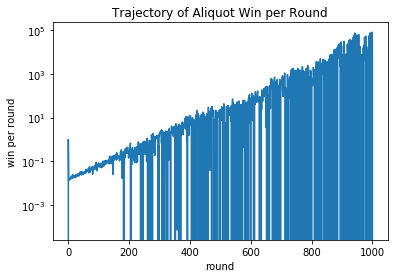

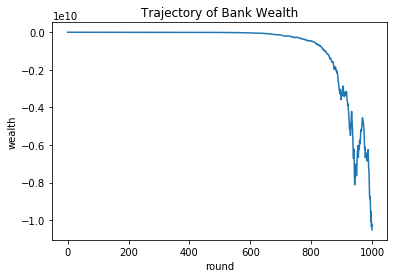

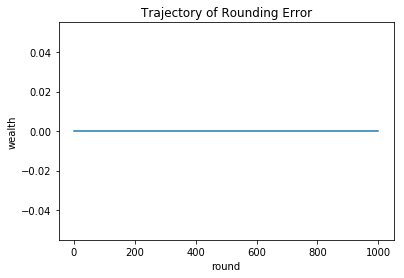

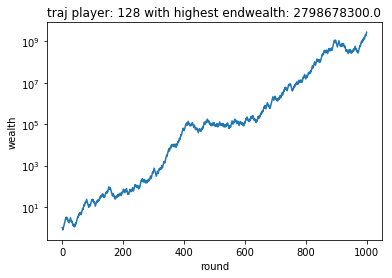

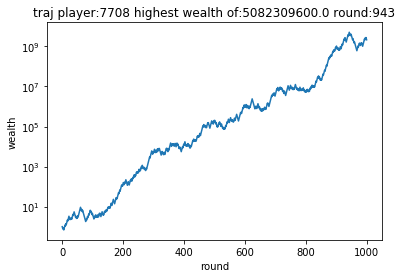

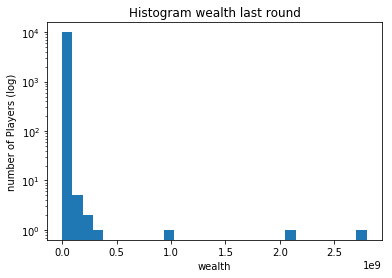

In [10]:
plt.figure()  
for iP in range(0,min(10, nrPlayer)):
  plt.plot(w[ 0:min(100, nrRound) , iP])

plt.title('example Trajectory of first 10 Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW[0:min(100, nrRound)])
plt.title('Trajectory of Average Wealth of all Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(sumW)
plt.title('Trajectory of Sum Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW)
plt.title('Trajectory of Average Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(medW)
plt.title('Trajectory of Median Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(aliquotWin)
plt.title('Trajectory of Aliquot Win per Round')
plt.yscale('log')
plt.ylabel("win per round")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(bankW)
plt.title('Trajectory of Bank Wealth')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(roundErr)
plt.title('Trajectory of Rounding Error')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
maxP = np.argmax(w[nrRound])
plt.plot(w[ : , maxP])
plt.title('traj player: '  + str(maxP) + ' with highest endwealth: ' + str(w[nrRound,maxP]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
plt.plot(w[ : , ind[1]])
plt.title('traj player:'  + str(ind[1]) + ' highest wealth of:' + str(w[ind[0],ind[1]]) + ' round:' + str(ind[0]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
print('wealth histogram: ', plt.hist(w[nrRound],bins=30,log=True))
plt.title('Histogram wealth last round')
plt.ylabel("number of Players (log)")
plt.xlabel("wealth")
# plt.grid(True)
plt.draw()
plt.show()



In [11]:
# check the influence of a leverage of 0.5 and tax 0.01, using same win factors
# leverage, fraction of wealth to bet in next round 1.0
tax = 0.01
lev = 0.5
print ('these parameters will be used:')
print('nrRound = ', nrRound)
print('nrPlayer = ', nrPlayer)
print('tax = ', tax)
print('leverage = ', lev)
print('bet, initial wealth of each player = ', bet)
print('lossFactor = ', lossFactor)
print('winFactor = ', winFactor)

# goto ln(3) calculate win matrix w



these parameters will be used:
nrRound =  1000
nrPlayer =  10000
tax =  0.01
leverage =  0.5
bet, initial wealth of each player =  1.0
lossFactor =  0.6
winFactor =  1.5


In [12]:
# calculate win matrix w
# w[iR, iP] == wealth of player iP in Round iR
w = np.zeros((nrRound+1,nrPlayer), dtype=np.float32)
w[0, :] = bet #start wealth = bet
#np.seterr(all='ignore') #suppress warnings on float errors, only for float16
for iR in range(0,nrRound):
  w[iR+1] = (w[iR] * (1 - lev)) + (w[iR] * f[iR] * lev) # amount not invested + win 
  indivTax = w[iR] * tax # wealthtax from last round for each player
  aliquotTax = np.sum(indivTax) / nrPlayer # tax to be redistributed to each Player
  w[iR+1] += aliquotTax - indivTax # subtract individual Tax and redistribute it evenly
  sumW[iR+1] = np.sum(w[iR+1])
  medW[iR+1] = np.median(w[iR+1])
  meanW[iR+1] = sumW[iR+1] / nrPlayer
  bankW[iR+1] = bankW[iR] + sumW[iR] - sumW[iR+1]
  aliquotWin[iR+1] = (sumW[iR+1] - sumW[iR]) / nrPlayer
  roundErr[iR+1] = sumW[iR+1] + bankW[iR+1]
#  w[iR+1] = w[iR] + aliquotWin[iR+1] # share everything, only for test

print('overall min wealth = ', np.amin(w))
print('overall max wealth = ', np.amax(w))
print('last round max wealth = ', np.amax(w[nrRound]))
print('last round bank wealth = ', bankW[nrRound])
print('last round aliquotWin = ', aliquotWin[nrRound])
print('last round meanW = ', meanW[nrRound])
print('last round medW = ', medW[nrRound])
print('last round sumW = ', sumW[nrRound])



overall min wealth =  0.0892696
overall max wealth =  7809623700000.0
last round max wealth =  4874513000000.0
last round bank wealth =  -301639680000000.0
last round aliquotWin =  606845300.0
last round meanW =  30163968000.0
last round medW =  12065661000.0
last round sumW =  301639680000000.0


wealth histogram:  (array([9.75e+03, 1.51e+02, 5.70e+01, 1.70e+01, 6.00e+00, 4.00e+00,
       2.00e+00, 5.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00]), array([1.4268852e+09, 1.6386310e+11, 3.2629929e+11, 4.8873551e+11,
       6.5117173e+11, 8.1360794e+11, 9.7604416e+11, 1.1384804e+12,
       1.3009166e+12, 1.4633528e+12, 1.6257890e+12, 1.7882251e+12,
       1.9506613e+12, 2.1130976e+12, 2.2755339e+12, 2.4379701e+12,
       2.6004064e+12, 2.7628423e+12, 2.9252785e+12, 3.0877147e+12,
       3.2501510e+12, 3.4125872e+12, 3.5750234e+12, 3.7374596e+12,
       3.8998958e+12, 4.0623321e+12, 4.2247683e+12, 4.3872045e+12,
       4.5496407e+12, 4.7120772e+12, 4.8745132e+12], dtype=float32), <a list of 30 Patch objects>)


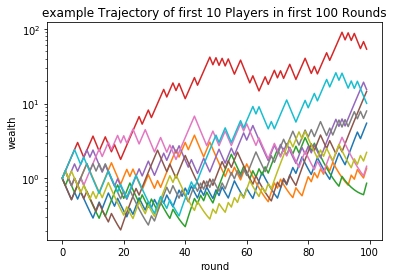

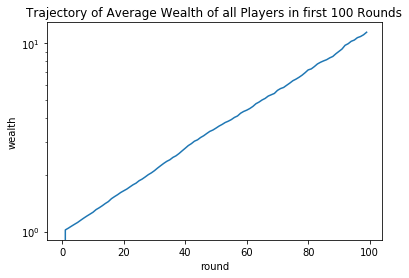

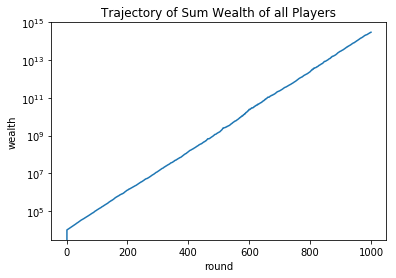

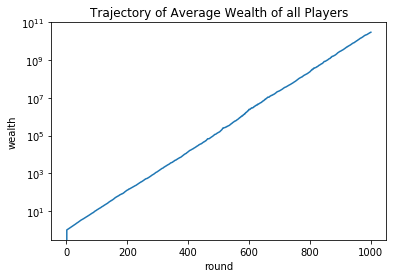

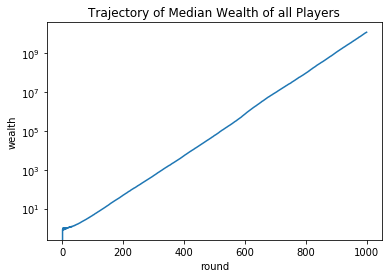

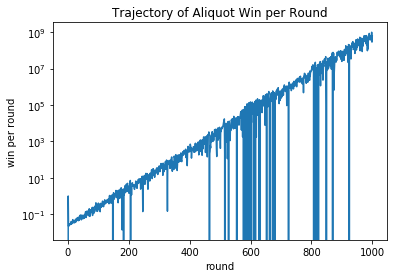

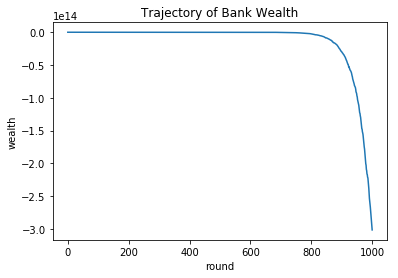

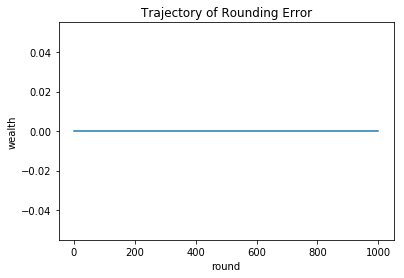

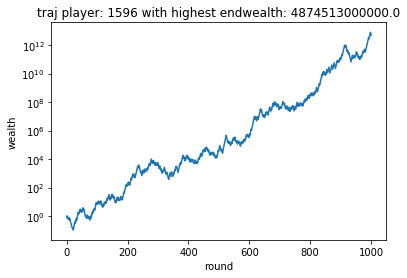

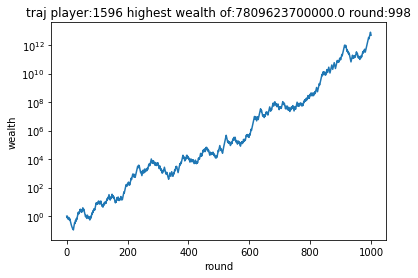

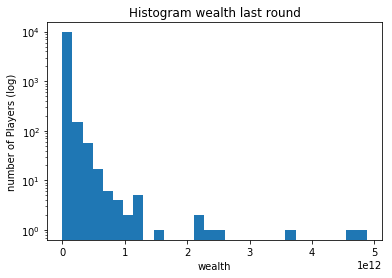

In [13]:
plt.figure()  
for iP in range(0,min(10, nrPlayer)):
  plt.plot(w[ 0:min(100, nrRound) , iP])

plt.title('example Trajectory of first 10 Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW[0:min(100, nrRound)])
plt.title('Trajectory of Average Wealth of all Players in first 100 Rounds')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(sumW)
plt.title('Trajectory of Sum Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(meanW)
plt.title('Trajectory of Average Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(medW)
plt.title('Trajectory of Median Wealth of all Players')
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(aliquotWin)
plt.title('Trajectory of Aliquot Win per Round')
plt.yscale('log')
plt.ylabel("win per round")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(bankW)
plt.title('Trajectory of Bank Wealth')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
plt.plot(roundErr)
plt.title('Trajectory of Rounding Error')
#plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
maxP = np.argmax(w[nrRound])
plt.plot(w[ : , maxP])
plt.title('traj player: '  + str(maxP) + ' with highest endwealth: ' + str(w[nrRound,maxP]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
plt.plot(w[ : , ind[1]])
plt.title('traj player:'  + str(ind[1]) + ' highest wealth of:' + str(w[ind[0],ind[1]]) + ' round:' + str(ind[0]))
plt.yscale('log')
plt.ylabel("wealth")
plt.xlabel("round")
plt.draw()

plt.figure()  
print('wealth histogram: ', plt.hist(w[nrRound],bins=30,log=True))
plt.title('Histogram wealth last round')
plt.ylabel("number of Players (log)")
plt.xlabel("wealth")
# plt.grid(True)
plt.draw()
plt.show()



# you can stop now or try different parameters